##### Lebelo Hailesilassie

##### 12 July 2023

## 1. Introduction and objectives

  #### Introduction:
    The purpose of this presentation is to outline the criteria of selection for dealers and provide an overview of my work. I will present a comprehensive analysis using machine learning techniques, specifically the RandomForest classifier, to classify dealers into two categories: risky and non-risky. The analysis is based on the probability generated by the model, with a predefined threshold of 10%. 
By leveraging this classification, I aim to identify dealers with a higher likelihood of potential issues and prioritize  efforts accordingly. This presentation will shed light on the selection criteria and provide valuable insights for risk assessment.

 #### Objective:
     The objective is to develop a scoring mechanism that considers dealer 
     characteristics, past purchasing behavior, and purchased vehicle 
     characteristics to identify dealers with a higher probability of 
     exceeding a 10% return rate. The "risky dealer score" will help in 
     prohibiting buyers with high scores from purchasing DealShield 
     guarantees in the future.




## 2. Data Understanding and Preprocessing

   #### Data Understanding
        Data Source: The data was provided by Cox Automotive
        Data Format: The data is in CSV format
        Data Variables: Categorical and Numerical

In [3]:
#Import necessary libraries for data analysis and visualization
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical computing
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Statistical visulaization

In [4]:
# Read the data from a CSV file into a pandas Dataframe
risky_dealer_df=pd.read_csv('Risky Dealer Case Study Transactions.csv')

In [5]:
# Copy the original data into a new DataFrame called 'data_df'
data_df = risky_dealer_df.copy()
# Check the number of rows and columns in the copied DataFrame
print(data_df.shape)

(278337, 25)


In [6]:
# Use the head() method to display the first few rows of the DataFrame
data_df.head()

,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,...,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned
0,351757,441081,37055,1FAHP3M27CL374352,CAAI,FORD,13000,2012,13050,COMPACT CAR,...,0,0,0,0,1,13-07-25,1.000000,NaN,1,0.0
1,351757,442235,248,1G1JE6SB7D4103706,DETA,CHEVROLET,13900,2013,13600,COMPACT CAR,...,0,0,0,0,1,13-10-24,NaN,NaN,0,NaN
2,351757,436280,39627,1G1PG5SC4C7102274,CAAI,CHEVROLET,13800,2012,14050,MIDSIZE CAR,...,0,0,0,1,1,13-04-18,-2.666667,41,0,NaN
3,351757,436280,50773,1G1PG5SC5C7113820,CAAI,CHEVROLET,12900,2012,13150,MIDSIZE CAR,...,0,0,0,1,1,13-04-18,1.000000,31,0,NaN
4,351757,434202,54133,1GNKVGED4BJ301146,SVAA,CHEVROLET,17800,2011,18050,SUV,...,0,0,0,1,1,13-02-26,-1.400000,34,0,NaN


##### Data Quality

In [7]:
# Call the info() method on the DataFrame to view information about the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278337 entries, 0 to 278336
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BuyerID          278337 non-null  int64  
 1   SellerID         278337 non-null  int64  
 2   Mileage          278337 non-null  int64  
 3   VIN              278337 non-null  object 
 4   SellingLocation  278337 non-null  object 
 5   CarMake          278335 non-null  object 
 6   SalePrice        278337 non-null  int64  
 7   CarYear          278337 non-null  int64  
 8   MMR              278337 non-null  int64  
 9   JDPowersCat      277981 non-null  object 
 10  LIGHTG           278337 non-null  int64  
 11  LIGHTY           278337 non-null  int64  
 12  LIGHTR           278337 non-null  int64  
 13  PSI              278337 non-null  int64  
 14  Arbitrated       278337 non-null  int64  
 15  Salvage          278337 non-null  int64  
 16  OVE              278337 non-null  int6

In [187]:
# Use the isnull().any() method to check for missing values in the DataFrame
missing_values = data_df.isnull().any()
# Print the missing values information
print("Columns with Missing Values:")
print(missing_values[missing_values])

Columns with Missing Values:
CarMake            True
JDPowersCat        True
Autocheck_score    True
ConditionReport    True
dtype: bool


In [188]:
# View the sum of missing values for each column
missing_values_sum=data_df.isnull().sum()
# Filter and print the columns with non-Zero missing values
non_zero_missing_values=missing_values_sum[missing_values_sum>0]
print('Columns with Non_Zero Missing Values:')
print(non_zero_missing_values)

Columns with Non_Zero Missing Values:
CarMake                 2
JDPowersCat           356
Autocheck_score      9320
ConditionReport    208332
dtype: int64


In [189]:
# Calculate the percentage of missing values in each column
missing_percentage = non_zero_missing_values / data_df.shape[0] * 100
# Print the percentage of missing values
print("Percentage of Missing Values:")
print(missing_percentage)


Percentage of Missing Values:
CarMake             0.000719
JDPowersCat         0.127903
Autocheck_score     3.348459
ConditionReport    74.848834
dtype: float64


##### Data Visualization and Deep Dive into some of the variables to understand paterns

In [11]:
# Calculate summary statistics using describe()
summary_stats = data_df.describe()
# Print the summary statistics
print("Summary Statistics:")
summary_stats

Summary Statistics:


,BuyerID,SellerID,Mileage,SalePrice,CarYear,MMR,LIGHTG,LIGHTY,LIGHTR,PSI,Arbitrated,Salvage,OVE,Simulcast,InLane,PSIEligible,Autocheck_score,Guaranteed,Returned
count,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,269017.000000,278337.000000,19693.000000
mean,183195.207784,297626.938797,84228.544933,11973.232032,2007.407140,11388.524882,0.306215,0.060639,0.217998,0.306650,0.071316,0.037555,0.034034,0.069459,0.333700,0.690659,1.205120,0.070752,0.211598
std,113415.181921,134761.222715,54879.931708,9083.860494,3.956124,9025.527367,0.460921,0.238667,0.412887,0.461104,0.257353,0.190118,0.181318,0.254233,0.471535,0.462223,1.744673,0.256411,0.408452
min,329.000000,0.000000,1.000000,1.000000,1936.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.599998,0.000000,0.000000
25%,78794.000000,204652.000000,38778.000000,5600.000000,2005.000000,4775.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000
50%,176870.000000,324162.000000,79599.000000,10100.000000,2008.000000,9700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.400000,0.000000,0.000000
75%,295757.000000,432754.000000,114088.000000,16000.000000,2011.000000,15750.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.272727,0.000000,0.000000
max,351757.000000,451900.000000,999999.000000,355000.000000,2014.000000,172000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.571429,1.000000,1.000000


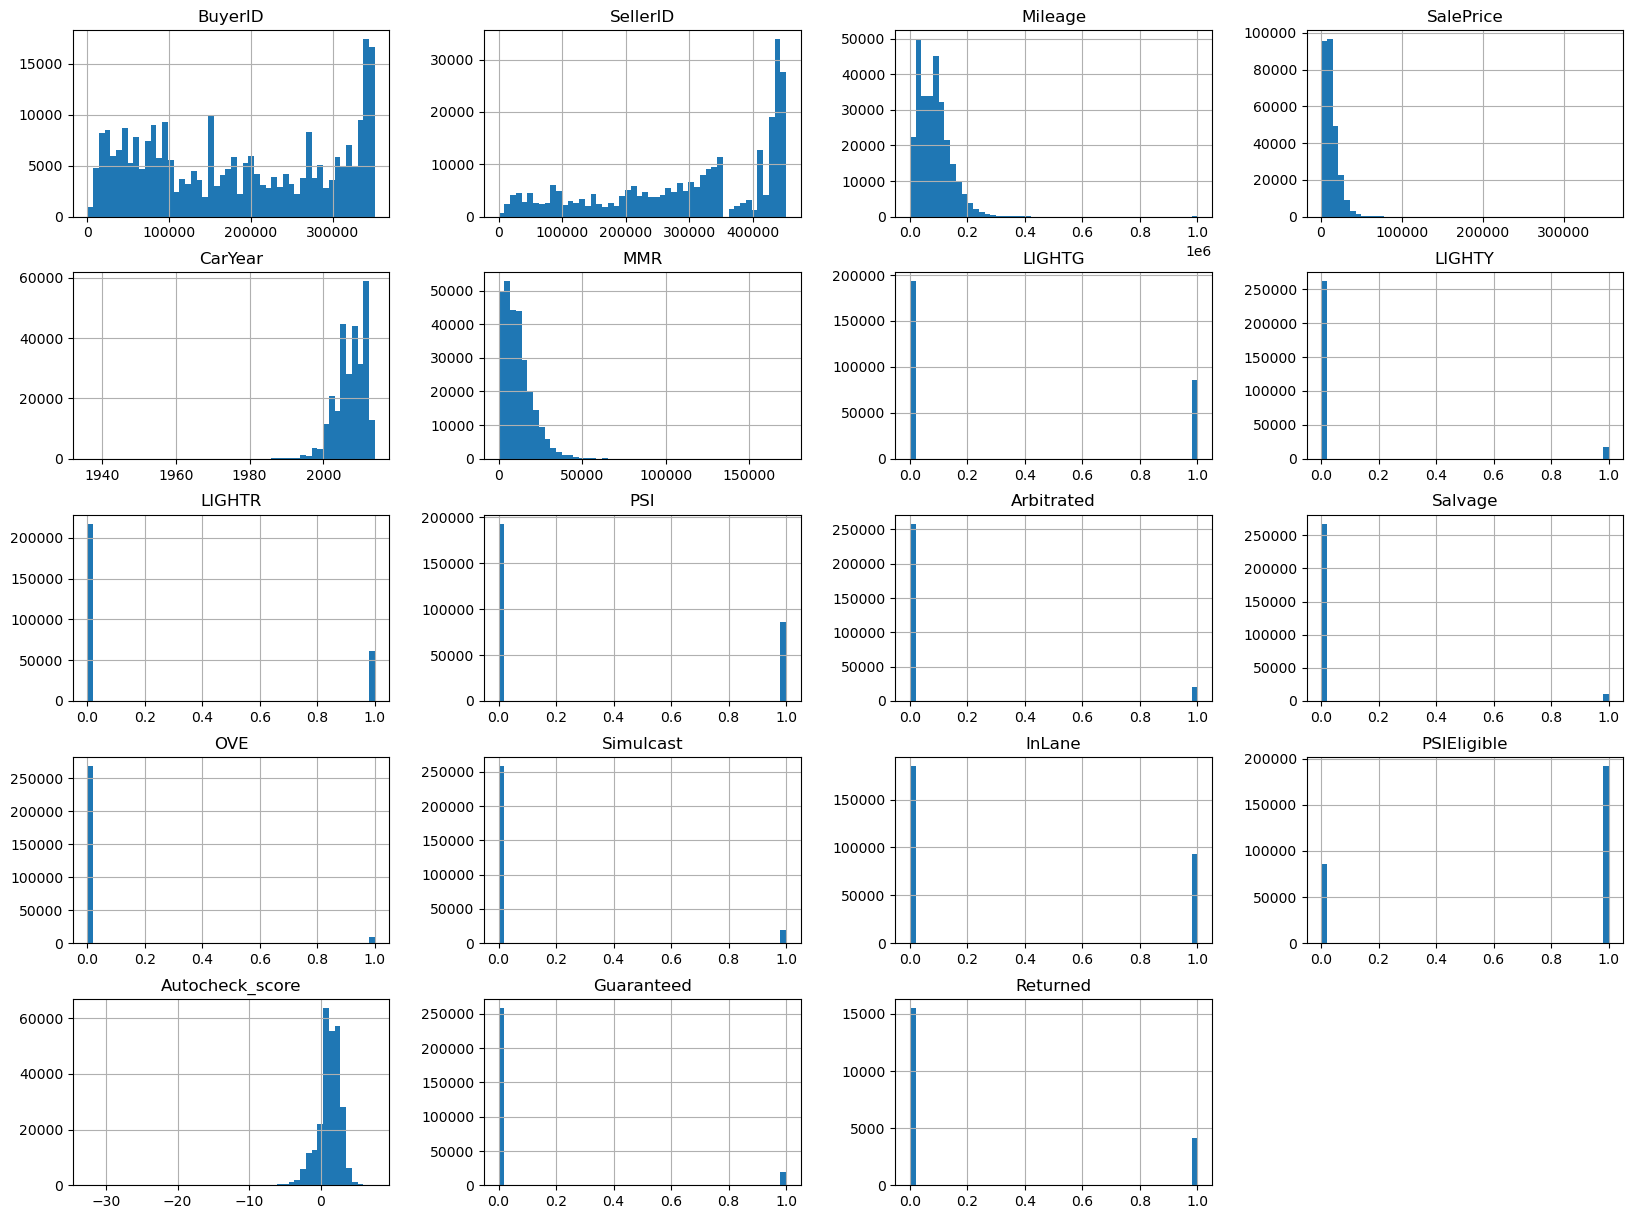

In [12]:
import matplotlib.pyplot as plt
# Ensure the graph is displayed inline in Jupyter Notebook
%matplotlib inline
# Plot histogram of the data
data_df.hist(bins=50, figsize=(20, 15))
# Set graph title
plt.title("Distribution of Data")
# Display the histogram
plt.show()

Check for Outliers

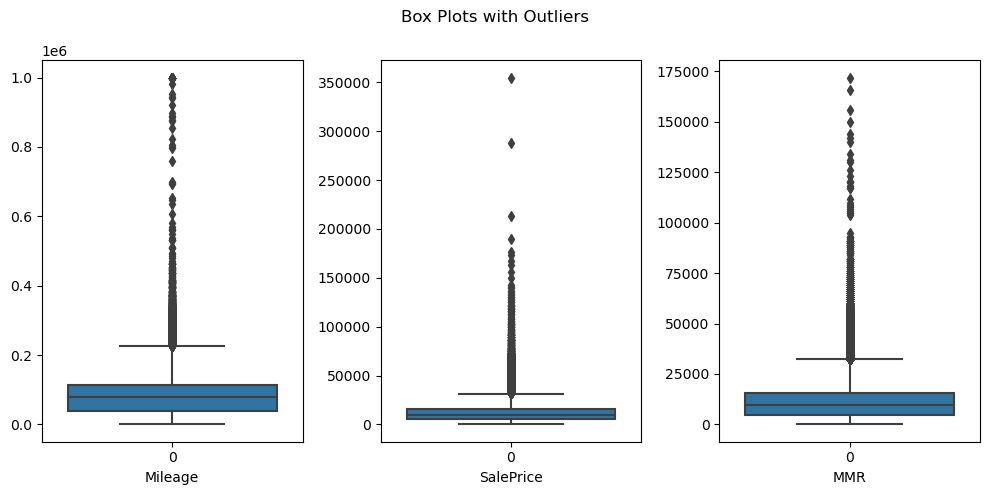

In [13]:
# Define the columns for box plots
columns_to_plot = ['Mileage', 'SalePrice', 'MMR']
# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(10, 5))
# Iterate over the columns and plot box plots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=data_df[column], ax=axes[i])
    axes[i].set_xlabel(column)
# Set a generic plot title
plt.suptitle('Box Plots with Outliers')
# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

Guaranteed vs Returned Distributions

In [14]:
# Calculate the percentage distribution of values in the 'Guaranteed' column
guaranteed_distribution = data_df['Guaranteed'].value_counts(normalize=True,dropna=False) * 100
# Print the percentage distribution of values
print("Percentage Distribution of 'Guaranteed' Values:")
print(guaranteed_distribution)

Percentage Distribution of 'Guaranteed' Values:
0    92.924764
1     7.075236
Name: Guaranteed, dtype: float64


In [15]:
# Calculate the percentage distribution of values in the 'Returned' column
returned_distribution = data_df['Returned'].value_counts(normalize=True,dropna=False) * 100
# Print the percentage distribution of values
print("Percentage Distribution of 'Returned' Values:")
print(returned_distribution)

Percentage Distribution of 'Returned' Values:
NaN    92.924764
0.0     5.578130
1.0     1.497106
Name: Returned, dtype: float64


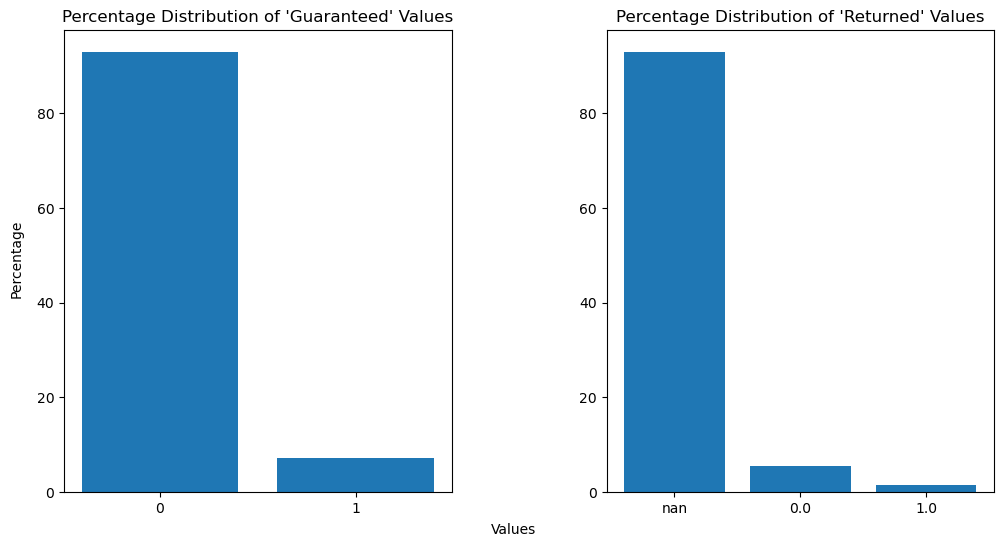

In [190]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the 'Guaranteed' distribution
axes[0].bar(guaranteed_distribution.index.astype(str), guaranteed_distribution.values)
axes[0].set_title("Percentage Distribution of 'Guaranteed' Values")

# Plot the 'Returned' distribution
axes[1].bar(returned_distribution.index.astype(str), returned_distribution.values)
axes[1].set_title("Percentage Distribution of 'Returned' Values")

# Set common y-axis label
fig.text(0.5, 0.04, 'Values', ha='center')
fig.text(0.08, 0.5, 'Percentage', va='center', rotation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

#### Deep Dive into SellingLocation and carMake

In [200]:
# Calculate the number of unique values in the 'SellingLocation' and 'CarMake' column
num_unique_values = data_df[['SellingLocation','CarMake']].nunique()
# Print the number of unique values
print('Number of Unique Values in SellingLocation and CarMake:')
print(num_unique_values)

Number of Unique Values in SellingLocation and CarMake:
SellingLocation     67
CarMake            200
dtype: int64


In [199]:
# Calculate the count of each unique value in 'SellingLocation', display top 20, and sort in descending order
count_by_location = data_df['SellingLocation'].value_counts().head(20).sort_values(ascending=False)
# Print the count of each unique value
print("Count by Location:")
print(count_by_location)

Count by Location:
THAA    41994
SVAA    31305
BIGH    22271
AYCA    17993
MAA     15347
CAAI    14596
DALA    14093
KCAA    10351
SLAA    10208
SAAA     8676
NADE     8398
FAAO     8363
AAA      6132
NASH     5655
FAA      5458
GCAA     4533
DFWA     4156
GOAA     4022
AAAW     2539
BWAE     2535
Name: SellingLocation, dtype: int64


In [20]:
# Calculate the count of each unique value in 'CarMake', display top 20, and sort in descending order
count_by_make = data_df['CarMake'].value_counts().head(20).sort_values(ascending=False)
# Print the count of each unique value
print("Count by Car Make:")
print(count_by_make)

Count by Car Make:
FORD             47072
CHEVROLET        38458
TOYOTA           22468
NISSAN           20491
DODGE            19303
HONDA            12582
CHRYSLER          9645
B M W             8487
JEEP              8459
LEXUS             8254
GMC               7243
HYUNDAI           6779
MERCEDES-BENZ     6600
KIA               5725
MAZDA             5554
VOLKSWAGEN        5260
CADILLAC          5014
PONTIAC           4305
INFINITI          4039
LINCOLN           3569
Name: CarMake, dtype: int64


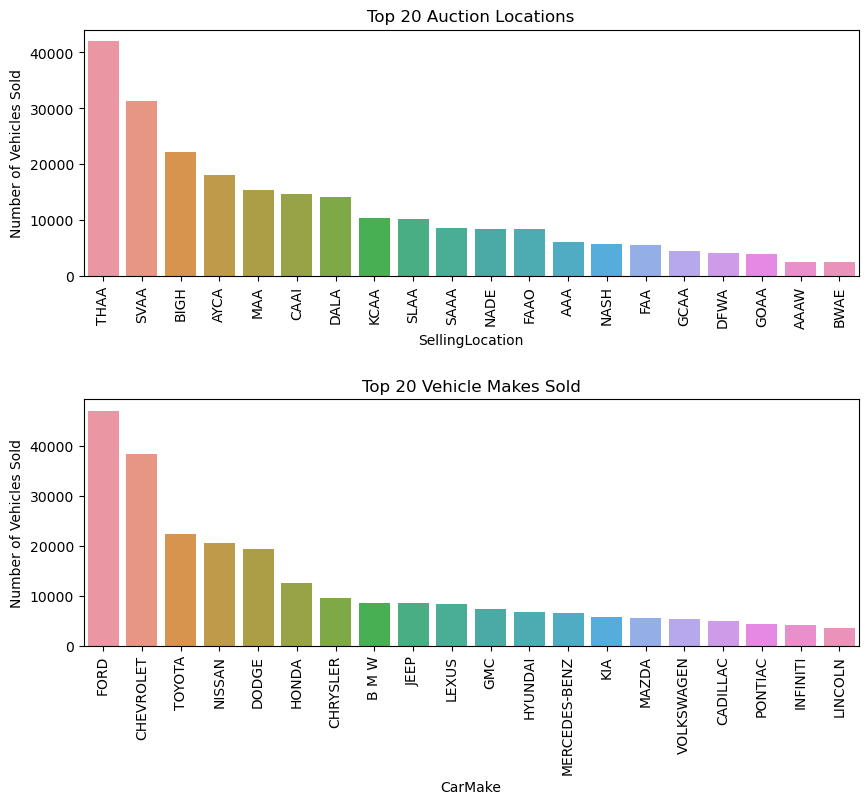

In [202]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first graph (Top 20 Auction Locations)
sns.barplot(x=count_by_location.index, y=count_by_location.values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 20 Auction Locations')
ax1.set_xlabel('SellingLocation')
ax1.set_ylabel('Number of Vehicles Sold')

# Plot the second graph (Top 20 Vehicle Make Sold)
sns.barplot(x=count_by_make.index, y=count_by_make.values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Top 20 Vehicle Makes Sold')
ax2.set_xlabel('CarMake')
ax2.set_ylabel('Number of Vehicles Sold')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

#### Deep Dive into rate of return by dealership to better understand the risk

In [203]:
guaranteed_dealers_df=data_df[data_df['Guaranteed']==1]
guaranteed_dealers_df.head()

,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,...,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned
0,351757,441081,37055,1FAHP3M27CL374352,CAAI,FORD,13000,2012,13050,COMPACT CAR,...,0,0,0,0,1,13-07-25,1.000000,NaN,1,0.0
11,351757,279792,38671,1VWAP7A3XCC037039,CAAI,VOLKSWAGEN,11000,2012,12650,MIDSIZE CAR,...,0,0,0,0,1,13-06-27,1.000000,NaN,1,1.0
17,351757,441081,25010,2G1WC5E37D1158811,CAAI,CHEVROLET,14700,2013,14750,MIDSIZE CAR,...,0,0,0,1,1,13-12-12,1.000000,27,1,0.0
27,351757,329264,40589,3VWPM71KX9M282604,CAAI,VOLKSWAGEN,11700,2009,12400,MIDSIZE CAR,...,0,0,0,0,1,13-10-09,1.142857,NaN,1,0.0
28,351757,441081,36386,3VWPP7AJ3DM638656,CAAI,VOLKSWAGEN,13600,2013,14400,MIDSIZE CAR,...,0,0,0,1,1,13-11-07,1.000000,36,1,0.0


In [204]:
# Calculate the return rate for each buyer or dealership
return_rate_by_buyer = guaranteed_dealers_df.groupby('BuyerID')['Returned'].mean()
# Sort the return rates in descending order
return_rate_by_buyer = return_rate_by_buyer.sort_values(ascending=False)
# Print the return rate by buyer or dealership
print("Return Rate by Buyer:")
print(return_rate_by_buyer)

Return Rate by Buyer:
BuyerID
214442    1.0
91444     1.0
292324    1.0
26088     1.0
292153    1.0
         ... 
118900    0.0
118846    0.0
117525    0.0
117352    0.0
136524    0.0
Name: Returned, Length: 2348, dtype: float64


In [205]:
# Calculate the return rate for each dealership or buyer's location
return_rate_by_location = guaranteed_dealers_df.groupby('SellingLocation')['Returned'].mean()
# Sort the return rates in descending order and limit to top 30
return_rate_by_location = return_rate_by_location.sort_values(ascending=False).head(30)
# Print the return rate by dealership or buyer's location
print("Return Rate by Dealership or Buyer's Location:")
print(return_rate_by_location)

Return Rate by Dealership or Buyer's Location:
SellingLocation
MISS    1.000000
WPBA    0.500000
DFWA    0.370370
BIGH    0.314705
KCAA    0.290040
CAAI    0.289524
SAAA    0.285714
THAA    0.257829
AAAW    0.250000
DALA    0.212121
AYCA    0.200916
SVAA    0.171369
RSAA    0.166667
NAA     0.153846
DETA    0.146341
NADE    0.136531
SLAA    0.135552
FAAO    0.115385
MAA     0.107558
SKYA    0.107143
GCAA    0.094044
AAA     0.090909
GOAA    0.090090
AREN    0.087719
TBAA    0.086957
FAA     0.083916
OAA     0.061947
NWE     0.059259
NASH    0.054545
MMAA    0.048458
Name: Returned, dtype: float64


In [206]:
# Calculate the return rate for each car make and sort in descending order
return_rate_by_carmake = guaranteed_dealers_df.groupby('CarMake')['Returned'].mean().sort_values(ascending=False).head(20)
# Print the return rate by car make (multiplying by 100 for percentage)
print("Return Rate by Car Make:")
print(return_rate_by_carmake * 100)

Return Rate by Car Make:
CarMake
FERRARI          100.000000
ASTON MARTIN     100.000000
PORSCHE           60.714286
MASERATI          57.142857
ISUZU             52.380952
BENTLEY           50.000000
LAND ROVER        45.161290
SAAB              40.909091
JAGUAR            39.743590
MINI              37.647059
SMART             37.500000
B M W             37.406015
AUDI              36.153846
MERCEDES-BENZ     32.692308
SUZUKI            30.588235
VOLVO             29.133858
SATURN            29.081633
HUMMER            28.947368
CADILLAC          26.585366
OLDSMOBILE        26.315789
Name: Returned, dtype: float64


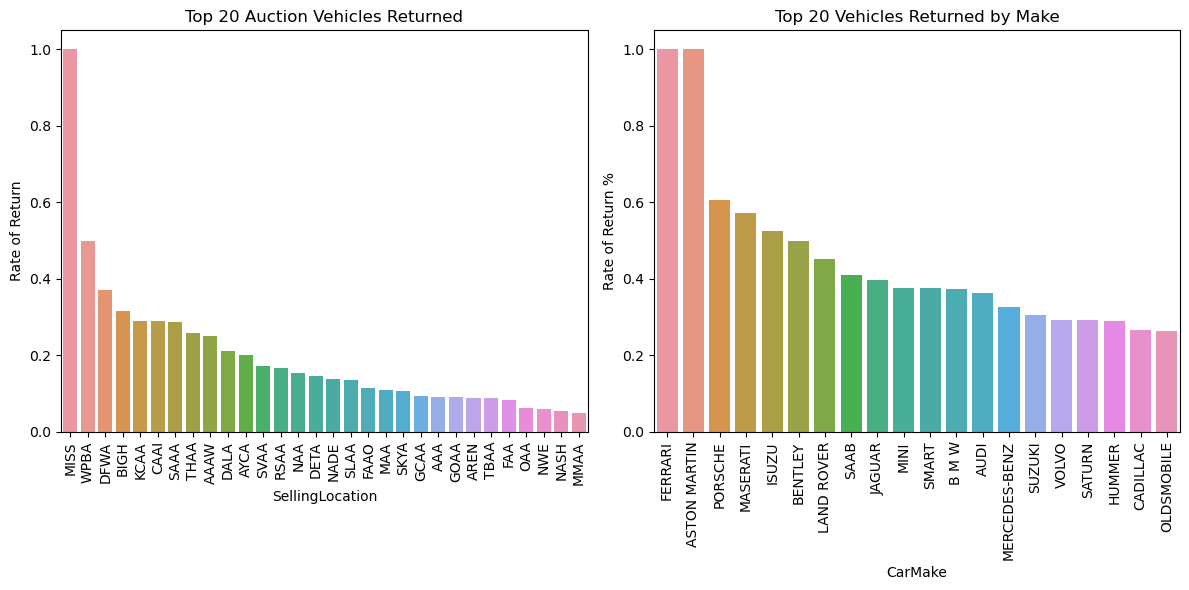

In [207]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot return rate by location
sns.barplot(x=return_rate_by_location.index, y=return_rate_by_location.values, ax=ax1)
ax1.set_title('Top 20 Auction Vehicles Returned')
ax1.set_xlabel('SellingLocation')
ax1.set_ylabel('Rate of Return')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot return rate by car make
sns.barplot(x=return_rate_by_carmake.index, y=return_rate_by_carmake.values, ax=ax2)
ax2.set_title('Top 20 Vehicles Returned by Make')
ax2.set_xlabel('CarMake')
ax2.set_ylabel('Rate of Return %')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Data Preprocessing

In [208]:
# Separate the input variables from the DataFrame
input_variables = data_df.drop('Returned', axis=1)
# Store the target variable separately
target_variable = data_df['Returned']
# Print the shapes of the input variables and target variable
print("Input Variables Shape:", input_variables.shape)
print("Target Variable Shape:", target_variable.shape)

Input Variables Shape: (278337, 24)
Target Variable Shape: (278337,)


In [209]:
# Set 'BuyerID' and 'SellerID' as the index in the 'input_variables' DataFrame
input_variables.set_index(['BuyerID', 'SellerID'], inplace=True)
# Display the updated DataFrame
input_variables.head()

Mileage                VIN SellingLocation    CarMake  \
BuyerID SellerID                                                          
351757  441081      37055  1FAHP3M27CL374352            CAAI       FORD   
        442235        248  1G1JE6SB7D4103706            DETA  CHEVROLET   
        436280      39627  1G1PG5SC4C7102274            CAAI  CHEVROLET   
        436280      50773  1G1PG5SC5C7113820            CAAI  CHEVROLET   
        434202      54133  1GNKVGED4BJ301146            SVAA  CHEVROLET   

                  SalePrice  CarYear    MMR  JDPowersCat  LIGHTG  LIGHTY  ...  \
BuyerID SellerID                                                          ...   
351757  441081        13000     2012  13050  COMPACT CAR       0       0  ...   
        442235        13900     2013  13600  COMPACT CAR       0       0  ...   
        436280        13800     2012  14050  MIDSIZE CAR       0       0  ...   
        436280        12900     2012  13150  MIDSIZE CAR       0       0  ...   
        434202        17800     2011  18050          SUV       1       0  ...   

                  Arbitrated  Salvage  OVE  Simulcast  InLane  PSIEligible  \
BuyerID SellerID                                                             
351757  441081             0        0    0          0       0            1   
        442235             0        0    0          0       0            1   
        436280             1        0    0          0       1            1   
        436280             0        0    0          0       1            1   
        434202             0        0    0          0       1            1   

                  SaleDate  Autocheck_score ConditionReport  Guaranteed  
BuyerID SellerID                                                         
351757  441081    13-07-25         1.000000             NaN           1  
        442235    13-10-24              NaN             NaN           0  
        436280    13-04-18        -2.666667              41           0  
        436280    13-04-18         1.000000              31           0  
        434202    13-02-26        -1.400000              34           0  

[5 rows x 22 columns]

#### Handle Missing Data

Drop Columns

In [210]:
# Drop the 'VIN', 'SaleDate', and 'ConditionReport' columns from the DataFrame
input_variables.drop(['VIN', 'SaleDate','ConditionReport'], axis=1, inplace=True)
# Display the updated DataFrame
input_variables.head()

Mileage SellingLocation    CarMake  SalePrice  CarYear  \
BuyerID SellerID                                                           
351757  441081      37055            CAAI       FORD      13000     2012   
        442235        248            DETA  CHEVROLET      13900     2013   
        436280      39627            CAAI  CHEVROLET      13800     2012   
        436280      50773            CAAI  CHEVROLET      12900     2012   
        434202      54133            SVAA  CHEVROLET      17800     2011   

                    MMR  JDPowersCat  LIGHTG  LIGHTY  LIGHTR  PSI  Arbitrated  \
BuyerID SellerID                                                                
351757  441081    13050  COMPACT CAR       0       0       0    0           0   
        442235    13600  COMPACT CAR       0       0       0    0           0   
        436280    14050  MIDSIZE CAR       0       0       0    1           1   
        436280    13150  MIDSIZE CAR       0       0       0    1           0   
        434202    18050          SUV       1       0       0    1           0   

                  Salvage  OVE  Simulcast  InLane  PSIEligible  \
BuyerID SellerID                                                 
351757  441081          0    0          0       0            1   
        442235          0    0          0       0            1   
        436280          0    0          0       1            1   
        436280          0    0          0       1            1   
        434202          0    0          0       1            1   

                  Autocheck_score  Guaranteed  
BuyerID SellerID                               
351757  441081           1.000000           1  
        442235                NaN           0  
        436280          -2.666667           0  
        436280           1.000000           0  
        434202          -1.400000           0

By Imputation

In [211]:
# fill in missing values in CarMake and JDPowersCat
missing_columns=['CarMake','JDPowersCat']
missing_values=input_variables[missing_columns].isnull().sum()
print(missing_values)

CarMake          2
JDPowersCat    356
dtype: int64


In [212]:
# Imput missing values with the most frequent category
for column in missing_columns:
    most_frequent=input_variables[column].mode()[0]
    input_variables[column].fillna(most_frequent,inplace=True)
# Verify that missing values are imputed
missing_values_after_imputation=input_variables[missing_columns].isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

Missing values after imputation:
CarMake        0
JDPowersCat    0
dtype: int64


By Mean

In [213]:
# fill missing values in Autocheck_score  with mean:
missing_autocheck='Autocheck_score'
missing_values=input_variables[missing_autocheck].isnull().sum()
print("Missing values in the variable:")
print(missing_values)

Missing values in the variable:
9320


In [214]:
# Calculate the mean of the Autocheck_score
mean_value=input_variables[missing_autocheck].mean()
# Imput missing values in Autocheck_score:
input_variables[missing_autocheck].fillna(mean_value,inplace=True)

In [215]:
# Verify that missing values are imputed
missing_values_after_imputation = input_variables[missing_autocheck].isnull().sum()
print("Missing values in the Autocheck Score after imputation:")
print(missing_values_after_imputation)

Missing values in the Autocheck Score after imputation:
0


In [216]:
# Verify if there are any missing values after handling
missing_values = input_variables.isnull().sum()
# Print the count of missing values
print("Missing Values after Handling:")
print(missing_values)

Missing Values after Handling:
Mileage            0
SellingLocation    0
CarMake            0
SalePrice          0
CarYear            0
MMR                0
JDPowersCat        0
LIGHTG             0
LIGHTY             0
LIGHTR             0
PSI                0
Arbitrated         0
Salvage            0
OVE                0
Simulcast          0
InLane             0
PSIEligible        0
Autocheck_score    0
Guaranteed         0
dtype: int64


### Data Analysis

In [217]:
# Convert categorical variabels to int64 and encode 
from sklearn.preprocessing import LabelEncoder
categorical_columns=['SellingLocation','CarMake','JDPowersCat']
for column in categorical_columns:
    input_variables[column]=input_variables[column].astype('category')
    input_variables[column]=input_variables[column].cat.codes.astype('int64')
input_variables.head()

Mileage  SellingLocation  CarMake  SalePrice  CarYear  \
BuyerID SellerID                                                          
351757  441081      37055               11       53      13000     2012   
        442235        248               18       25      13900     2013   
        436280      39627               11       25      13800     2012   
        436280      50773               11       25      12900     2012   
        434202      54133               60       25      17800     2011   

                    MMR  JDPowersCat  LIGHTG  LIGHTY  LIGHTR  PSI  Arbitrated  \
BuyerID SellerID                                                                
351757  441081    13050            0       0       0       0    0           0   
        442235    13600            0       0       0       0    0           0   
        436280    14050            4       0       0       0    1           1   
        436280    13150            4       0       0       0    1           0   
        434202    18050            7       1       0       0    1           0   

                  Salvage  OVE  Simulcast  InLane  PSIEligible  \
BuyerID SellerID                                                 
351757  441081          0    0          0       0            1   
        442235          0    0          0       0            1   
        436280          0    0          0       1            1   
        436280          0    0          0       1            1   
        434202          0    0          0       1            1   

                  Autocheck_score  Guaranteed  
BuyerID SellerID                               
351757  441081           1.000000           1  
        442235           1.205120           0  
        436280          -2.666667           0  
        436280           1.000000           0  
        434202          -1.400000           0

 Categorical vs. Categorical: Chi-square test of independence test on SellingLocation, CarMake and JDPowerscat:

The p-value is very small (P<5%) and below the predetermined significance level, it indicates a statistically significant relationship or association between the variables. In this case, We can conclude that the variables are correlated.

the degrees of freedom in a chi-square test of independence is calculated as:

df = (r - 1) * (c - 1)

where:

df represents the degrees of freedom,
r represents the number of rows or categories in one variable,
c represents the number of columns or categories in the other variable.


In [218]:
import scipy.stats as stats
# Categorical vs. Categorical: Chi-square test of independence
categorical_df=input_variables[['SellingLocation','CarMake','JDPowersCat']]
# Create a contingency table
contingency_table = pd.crosstab(categorical_df['SellingLocation'], [categorical_df['CarMake'], categorical_df['JDPowersCat']])
# Perform chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val) #There is correlation

Chi-square statistic: 204610.22840796274
Degrees of freedom: 24354
p-value: 0.0


 Binary vs. Binary: Chi-square test of independence or Phi coefficient

In [219]:
# Create a contingency table using crosstab
cross_tab = pd.crosstab(input_variables['LIGHTG'], input_variables['PSI'])

# Perform Chi-square test of independence
chi2, pval_chi = stats.chisquare(cross_tab)

print("Chi-square statistic:", chi2)
print("P-value:", pval_chi)

Chi-square statistic: [42165.46803638  3657.30415222]
P-value: [0. 0.]


Categorical vs. Continuous: ANOVA

In [220]:
# Categorical vs. Continuous: ANOVA or Kruskal-Wallis test
anova_result = stats.f_oneway(*[input_variables[input_variables['SellingLocation'] == loc]['SalePrice'] for loc in input_variables['SellingLocation'].unique()])
print("\nCategorical vs. Continuous:")
print("ANOVA:")
print("F-value:", anova_result.statistic)
print("p-value:", anova_result.pvalue)


Categorical vs. Continuous:
ANOVA:
F-value: 735.770852780835
p-value: 0.0


Binary vs. Continuous: Point-biserial correlation or t-test

In [221]:
 #Binary vs. Continuous: Point-biserial correlation or t-test
point_biserial_corr2, pval_pb2 = stats.pointbiserialr(input_variables['LIGHTG'], input_variables['SalePrice'])

t_test, pval_ttest = stats.ttest_ind(input_variables.loc[input_variables['LIGHTG'] == 0, 'SalePrice'],
                                     input_variables.loc[input_variables['LIGHTG'] == 1, 'SalePrice'])
print("\nBinary vs. Continuous:")
print("Point-biserial correlation:")
print("Correlation coefficient:", point_biserial_corr2)
print("p-value:", pval_pb2)

print("\nT-test:")
print("T-value:", t_test)
print("p-value:", pval_ttest)


Binary vs. Continuous:
Point-biserial correlation:
Correlation coefficient: 0.13446115420125207
p-value: 0.0

T-test:
T-value: -71.5883988013355
p-value: 0.0


Continuous vs. Continuous: Pearson correlation

In [222]:
# Continuous vs. Continuous: Pearson correlation
pearson_corr, pval_pearson = stats.pearsonr(input_variables['Mileage'], input_variables['SalePrice'])
print("\nContinuous vs. Continuous:")
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pval_pearson)


Continuous vs. Continuous:
Pearson correlation coefficient: -0.5879054272499857
p-value: 0.0


The p-values from the Chi-square test of independence, ANOVA and Pearson correlation are all very close to 0 (p=0.0), it indicates that there is a significant association between the categorical variables,binary and continuous. This means that the variables are not independent and considering them during machine learning prediction and data imputation can be beneficial.

Using significant variables in machine learning can improve the predictive performance of my models, as they provide valuable information about the relationship between the variables and the target variable. By including these variables as features, I allow the model to capture and utilize the association between them.

In [42]:
# Verify the shape of the input variables and target variable
input_shape = input_variables.shape
target_shape = target_variable.shape
# Print the shape of the input variables and target variable
print("Input Variables Shape:", input_shape)
print("Target Variable Shape:", target_shape)

Input Variables Shape: (278337, 19)
Target Variable Shape: (278337,)


In [43]:
#!pip install kmodes

### Imput missing values in target_variable 'Returned' Using KPrototypes Clustering Methodology

Convert Categorical Variables to float by encoding

In [44]:
# Convert categorical variables to float and encode 
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
categorical_columns=['SellingLocation','CarMake','JDPowersCat']
for column in categorical_columns:
    input_variables[column]=input_variables[column].astype('category')
    input_variables[column]=input_variables[column].cat.codes.astype('int64')
input_variables.head()

Mileage  SellingLocation  CarMake  SalePrice  CarYear  \
BuyerID SellerID                                                          
351757  441081      37055               11       53      13000     2012   
        442235        248               18       25      13900     2013   
        436280      39627               11       25      13800     2012   
        436280      50773               11       25      12900     2012   
        434202      54133               60       25      17800     2011   

                    MMR  JDPowersCat  LIGHTG  LIGHTY  LIGHTR  PSI  Arbitrated  \
BuyerID SellerID                                                                
351757  441081    13050            0       0       0       0    0           0   
        442235    13600            0       0       0       0    0           0   
        436280    14050            4       0       0       0    1           1   
        436280    13150            4       0       0       0    1           0   
        434202    18050            7       1       0       0    1           0   

                  Salvage  OVE  Simulcast  InLane  PSIEligible  \
BuyerID SellerID                                                 
351757  441081          0    0          0       0            1   
        442235          0    0          0       0            1   
        436280          0    0          0       1            1   
        436280          0    0          0       1            1   
        434202          0    0          0       1            1   

                  Autocheck_score  Guaranteed  
BuyerID SellerID                               
351757  441081           1.000000           1  
        442235           1.205120           0  
        436280          -2.666667           0  
        436280           1.000000           0  
        434202          -1.400000           0

#### Cluster Data Using kPrototypes to predict classes on Target_Variable 'Returned'

k-Prototypes is a clustering algorithm that combines k-means and k-modes algorithms to handle data with both numerical and categorical features. It is designed to group similar objects together based on their similarity in both numerical and categorical attributes.

It considers both the values and categories of the features when forming clusters. It calculates the dissimilarity between data points using a combination of distance measures for numerical features and matching measures for categorical features. By considering both types of features, it can effectively cluster data that contains a mix of numeric and categorical variables.


In [223]:
#Initialize and fit the K-Prototypes model
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2, n_init=3)
clusters = kproto.fit_predict(input_variables.values, categorical=[1, 2, 6])  # Specify the categorical columns


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 55111, ncost: 191774289210557.97
Run: 1, iteration: 2/100, moves: 10733, ncost: 189987362181008.28
Run: 1, iteration: 3/100, moves: 2825, ncost: 189706456876214.84
Run: 1, iteration: 4/100, moves: 1649, ncost: 189637030527235.97
Run: 1, iteration: 5/100, moves: 904, ncost: 189618088748014.1
Run: 1, iteration: 6/100, moves: 494, ncost: 189612420884417.0
Run: 1, iteration: 7/100, moves: 258, ncost: 189610874793081.94
Run: 1, iteration: 8/100, moves: 106, ncost: 189610620793824.9
Run: 1, iteration: 9/100, moves: 32, ncost: 189610596880870.28
Run: 1, iteration: 10/100, moves: 19, ncost: 189610583866069.2
Run: 1, iteration: 11/100, moves: 9, ncost: 189610581859064.66
Run: 1, iteration: 12/100, moves: 1, ncost: 189610581841288.4
Run: 1, iteration: 13/100, moves: 0, ncost: 189610581841288.4
Init: initializi

In [224]:
# Predict the clusters for the input variables
input_variables['Cluster']=clusters
# Display the updated DataFrame
print("Updated input_variables DataFrame:")
input_variables.head()

Updated input_variables DataFrame:


Mileage  SellingLocation  CarMake  SalePrice  CarYear  \
BuyerID SellerID                                                          
351757  441081      37055               11       53      13000     2012   
        442235        248               18       25      13900     2013   
        436280      39627               11       25      13800     2012   
        436280      50773               11       25      12900     2012   
        434202      54133               60       25      17800     2011   

                    MMR  JDPowersCat  LIGHTG  LIGHTY  LIGHTR  PSI  Arbitrated  \
BuyerID SellerID                                                                
351757  441081    13050            0       0       0       0    0           0   
        442235    13600            0       0       0       0    0           0   
        436280    14050            4       0       0       0    1           1   
        436280    13150            4       0       0       0    1           0   
        434202    18050            7       1       0       0    1           0   

                  Salvage  OVE  Simulcast  InLane  PSIEligible  \
BuyerID SellerID                                                 
351757  441081          0    0          0       0            1   
        442235          0    0          0       0            1   
        436280          0    0          0       1            1   
        436280          0    0          0       1            1   
        434202          0    0          0       1            1   

                  Autocheck_score  Guaranteed  Cluster  
BuyerID SellerID                                        
351757  441081           1.000000           1        1  
        442235           1.205120           0        1  
        436280          -2.666667           0        1  
        436280           1.000000           0        1  
        434202          -1.400000           0        1

#### Get the predicted class

In [225]:
# Calculate the count of instances in each cluster
cluster_counts = input_variables['Cluster'].value_counts()
 #Print the count of instances in each cluster
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
2    121913
1    117263
0     39161
Name: Cluster, dtype: int64


In [226]:
# Get the cluster labels for each instance
labels = kproto.labels_
# Print the cluster labels for each instance
print("Cluster Labels:")
print(labels)

Cluster Labels:
[1 1 1 ... 2 2 0]


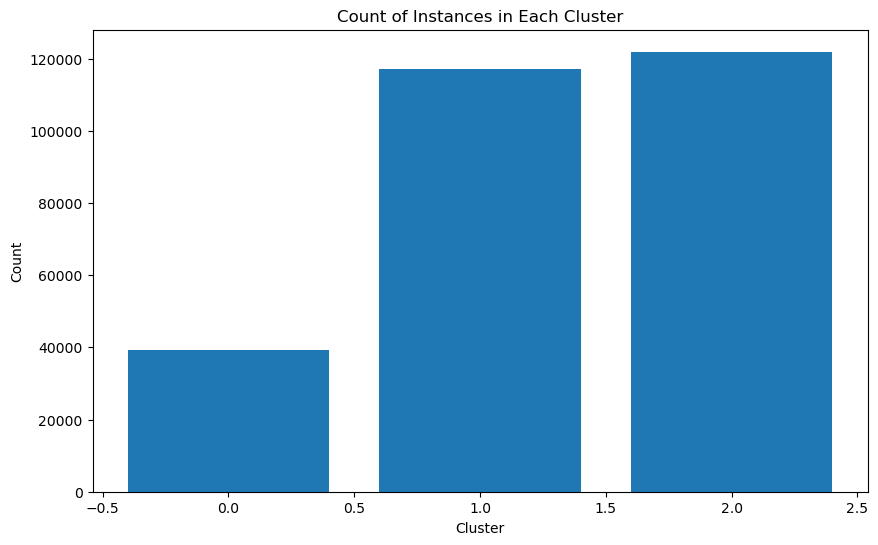

In [227]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values)

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Instances in Each Cluster')

# Show the plot
plt.show()

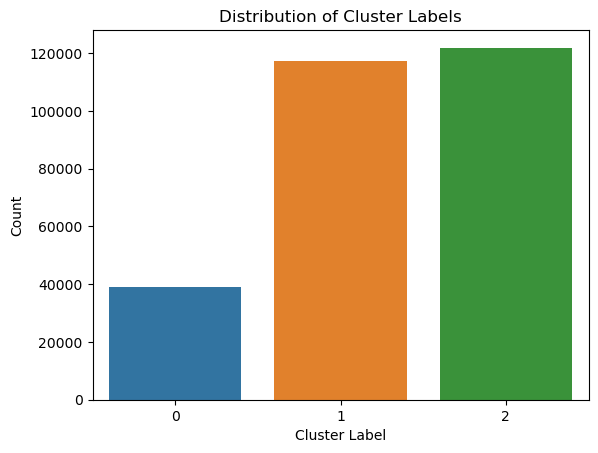

In [228]:
# Calculate the count of instances in each cluster
cluster_counts = pd.Series(labels).value_counts()

# Plot the bar plot
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Distribution of Cluster Labels')
plt.show()

In [232]:
# Specify the clusters for which you want to display example rows
clusters_to_display = [2] # try for clusters 1 and 2
# Iterate over the clusters and display example rows
for cluster in clusters_to_display:
    print(f"Examples for Cluster {cluster}:")
    cluster_examples = input_variables[input_variables['Cluster'] == cluster].head()
    print(cluster_examples)
    print()

Examples for Cluster 2:
                  Mileage  SellingLocation  CarMake  SalePrice  CarYear  \
BuyerID SellerID                                                          
351757  393565      70294               11      164      14200     2011   
351746  446865      69361               21       81      12200     2009   
        335161      86568               24       81      11100     2008   
        334433      90743               21        1      18400     2009   
        254069      78944                0        1      18100     2008   

                    MMR  JDPowersCat  LIGHTG  LIGHTY  LIGHTR  PSI  Arbitrated  \
BuyerID SellerID                                                                
351757  393565    14550            4       0       0       0    0           0   
351746  446865    11600            4       0       0       0    1           0   
        335161    10600            4       0       0       0    1           0   
        334433    17800            7       0 

 Evaluate the clustering model using silhouette coefficients- A measure of clusters quality-0.5451974003672013

In [52]:
#from sklearn.metrics import silhouette_score
#silhouette_score(input_variables,labels)

In [234]:
input_variables.head()

Mileage  SellingLocation  CarMake  SalePrice  CarYear  \
BuyerID SellerID                                                          
351757  441081      37055               11       53      13000     2012   
        442235        248               18       25      13900     2013   
        436280      39627               11       25      13800     2012   
        436280      50773               11       25      12900     2012   
        434202      54133               60       25      17800     2011   

                    MMR  JDPowersCat  LIGHTG  LIGHTY  LIGHTR  PSI  Arbitrated  \
BuyerID SellerID                                                                
351757  441081    13050            0       0       0       0    0           0   
        442235    13600            0       0       0       0    0           0   
        436280    14050            4       0       0       0    1           1   
        436280    13150            4       0       0       0    1           0   
        434202    18050            7       1       0       0    1           0   

                  Salvage  OVE  Simulcast  InLane  PSIEligible  \
BuyerID SellerID                                                 
351757  441081          0    0          0       0            1   
        442235          0    0          0       0            1   
        436280          0    0          0       1            1   
        436280          0    0          0       1            1   
        434202          0    0          0       1            1   

                  Autocheck_score  Guaranteed  Cluster  
BuyerID SellerID                                        
351757  441081           1.000000           1        1  
        442235           1.205120           0        1  
        436280          -2.666667           0        1  
        436280           1.000000           0        1  
        434202          -1.400000           0        1

#### Imput missing values based of cluster behavior(Mode Value)

In [235]:
# Reset the index of the input variables DataFrame
input_variables = input_variables.reset_index(drop=True)
# Identify the missing values in the target variable
missing_indices = pd.isna(target_variable)

# Group the target variable by cluster and calculate the mode for each cluster
cluster_mode = target_variable.groupby(input_variables['Cluster']).transform(lambda x: x.mode().iat[0])

# Fill in the missing values with the corresponding cluster mode
target_variable[missing_indices] = cluster_mode[missing_indices]

/var/folders/ph/byvhmcpd42s3gc9m2xh7kmk40000gn/T/ipykernel_12766/3142417706.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_variable[missing_indices] = cluster_mode[missing_indices]


In [236]:
# Reset the index of the input_variables DataFrame
#input_variables = input_variables.reset_index(drop=True)
 #Get the mode value of the target variable for instances in the cluster
cluster_mode = target_variable[input_variables['Cluster'] == cluster].mode().values[0]
# Print the cluster mode value
print("Cluster Mode Value:", cluster_mode)

Cluster Mode Value: 0.0


In [237]:
# Calculate the count of missing values in the target variable
missing_values_count = target_variable.isna().sum()
# Print the count of missing values
print("Missing Values in Target Variable:", missing_values_count)

Missing Values in Target Variable: 0


In [238]:
target_variable.value_counts()

0.0    274170
1.0      4167
Name: Returned, dtype: int64

In [239]:
#input_variables.to_csv('input_variables.csv', index=False)
#target_variable.to_csv('target_variable.csv', index=False)

## 3. Feature Engineering and Model selection
Identify and select relevant features that capture dealer characteristics and behaviors.
Create additional features that provide insights into dealer risk
Historical return rate for guaranteed vehicles.
Purchase volume or frequency.
Vehicle attributes that might impact returns

##### Feature and Target

In [240]:
# Get features and testing
X = input_variables  # Features
y = target_variable  # Target variable
# Print the shape of the original data before split
print("Original data shape:", X.shape,y.shape)
# Define class weights
class_weights={
    0:1.0, # Weight for class 0 (majority class)
    1:5.0 # Weight for class 1 (minority class)
}

Original data shape: (278337, 20) (278337,)


In [241]:
X.head()

,Mileage,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,LIGHTG,LIGHTY,LIGHTR,PSI,Arbitrated,Salvage,OVE,Simulcast,InLane,PSIEligible,Autocheck_score,Guaranteed,Cluster
0,37055,11,53,13000,2012,13050,0,0,0,0,0,0,0,0,0,0,1,1.000000,1,1
1,248,18,25,13900,2013,13600,0,0,0,0,0,0,0,0,0,0,1,1.205120,0,1
2,39627,11,25,13800,2012,14050,4,0,0,0,1,1,0,0,0,1,1,-2.666667,0,1
3,50773,11,25,12900,2012,13150,4,0,0,0,1,0,0,0,0,1,1,1.000000,0,1
4,54133,60,25,17800,2011,18050,7,1,0,0,1,0,0,0,0,1,1,-1.400000,0,1


##### Training and Testing Sets Split

In [242]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Print the shape of the training set
print("Training set shape:", X_train.shape, y_train.shape)

# Print the shape of the testing set
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (222669, 20) (222669,)
Testing set shape: (55668, 20) (55668,)


### Model 3.1: RandomForest


RandomForestClassifier is a machine learning algorithm that belongs to the family of ensemble methods. It is designed for classification tasks and combines multiple decision trees to make predictions.

n_estimators=100: This parameter specifies the number of decision trees (estimators) that will be used in the random forest. In this case, 100 decision trees are used to build the random forest model.

random_state=42: This parameter sets the random seed, which ensures reproducibility of the results. By setting it to a specific value (42 in this case), the same random numbers will be generated each time the code is executed, leading to consistent results.

Random forest is good at dealing with outliers due to its ensemble nature and the way it aggregates predictions from multiple decision trees.

##### Robust to individual Outliers

##### Stable Prediction

##### Feature selection

##### Train and fit the model

In [243]:
from sklearn.ensemble import RandomForestClassifier
# Training the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100,class_weight=class_weights, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0, 1: 5.0}, random_state=42)

##### Get Prediction and predicted probabilities for the input variables

In [244]:
# Testing the model
y_pred_rf = model_rf.predict(X_test)
print(y_pred_rf)

[0. 0. 0. ... 0. 0. 0.]


In [245]:
y_prob_rf =model_rf.predict_proba(input_variables)
print(y_prob_rf)

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.09 0.91]
 [0.79 0.21]]


The probability of returning a vehicle by extracting the probabilities for the positive class (class 1)

In [246]:
y_prob_rf_positive = y_prob_rf[:, 1]
print(y_prob_rf_positive)

[0.   0.   0.   ... 0.   0.91 0.21]


##### Model Performance

In [247]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_rf)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_rf)
print("Recall:", recall)

# F1 score
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1)

Accuracy: 0.9948803621470145
Precision: 0.8795013850415513
Recall: 0.7623049219687875
F1 Score: 0.8167202572347266


### 3.2 Gradient Boosting

The GradientBoostingClassifier is a machine learning algorithm that belongs to the family of boosting methods. It is designed for classification tasks and combines multiple weak learners (decision trees) in an additive manner to make predictions.

###### Error reduction

###### Outlier resilience

###### Robustness to noise


##### Train the model

In [248]:
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate the Gradient Boosting classifier
model_gb = GradientBoostingClassifier(random_state=42)

# Train the model
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

##### Get Prediction

In [165]:
# Make predictions on the testing set
y_pred_gb = model_gb.predict(X_test)

#### Model Performance 

In [249]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.994772580297478
Precision: 0.8743093922651933
Recall: 0.7599039615846338


### 3.3 Model Optimization RandomForest

In [251]:
# Instantiate and train the Random Forest model
random_forest_opt = RandomForestClassifier(max_depth=None, 
                                           min_samples_split=10, 
                                           n_estimators=300,
                                           class_weight=class_weights,
                                           random_state=42)
random_forest_opt.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf_opt = random_forest_opt.predict(X_test)

# Evaluate the Random Forest model optimization
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
precision_rf_opt = precision_score(y_test, y_pred_rf_opt)
recall_rf_opt = recall_score(y_test, y_pred_rf_opt)
f1_rf_opt = f1_score(y_test, y_pred_rf_opt)

print("Accuracy:", accuracy_rf_opt)
print("Precision:", precision_rf_opt)
print("Recall:", recall_rf_opt)
print("F1 Score:", f1_rf_opt)

Accuracy: 0.9949522167133721
Precision: 0.8467336683417085
Recall: 0.8091236494597839
F1 Score: 0.827501534683855


##### Predicted probabilities for the input variable

In [252]:
y_prob_rf_opt =random_forest_opt.predict_proba(input_variables)
print(y_prob_rf_opt)

[[0.99565826 0.00434174]
 [1.         0.        ]
 [0.99675926 0.00324074]
 ...
 [1.         0.        ]
 [0.12152141 0.87847859]
 [0.427148   0.572852  ]]


In [253]:
y_prob_rf_positive_opt = y_prob_rf_opt[:, 1]
print(y_prob_rf_positive_opt)

[0.00434174 0.         0.00324074 ... 0.         0.87847859 0.572852  ]


## 4. Results-Putting it all Together

#### 4.1 Model Comparison

In [254]:
from IPython.display import display
import pandas as pd

# Create a DataFrame for the table
data = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Random Forest': ['99.49%', '84.67%', '80.91%', '82.75%'],
        'Gradient Boosting': ['99.48%', '87.43%', '75.99%', '-']}
df = pd.DataFrame(data)

# Display the table
display(df)

,Metric,Random Forest,Gradient Boosting
0,Accuracy,99.49%,99.48%
1,Precision,84.67%,87.43%
2,Recall,80.91%,75.99%
3,F1 Score,82.75%,-


#### 4.2 Visualizing a Classifier's Performance-Random Forest


Create Confusion Matrix


In [255]:
from sklearn.metrics import confusion_matrix
# Create confusion mantrix
matrix=confusion_matrix(y_test,y_pred_rf_opt)
print(matrix)

[[54713   122]
 [  159   674]]


True Class 0 (Actual Negative): There are 54,713 instances that truly belong to class 0, and they are correctly predicted as class 0 (True Negative).

False Class 0 (Actual Negative, Predicted Positive): There are 122 instances that actually belong to class 0, but they are incorrectly predicted as class 1 (False Positive or Type I error).

False Class 1 (Actual Positive, Predicted Negative): There are 159 instances that actually belong to class 1, but they are incorrectly predicted as class 0 (False Negative or Type II error).

True Class 1 (Actual Positive): There are 674 instances that truly belong to class 1, and they are correctly predicted as class 1 (True Positive).

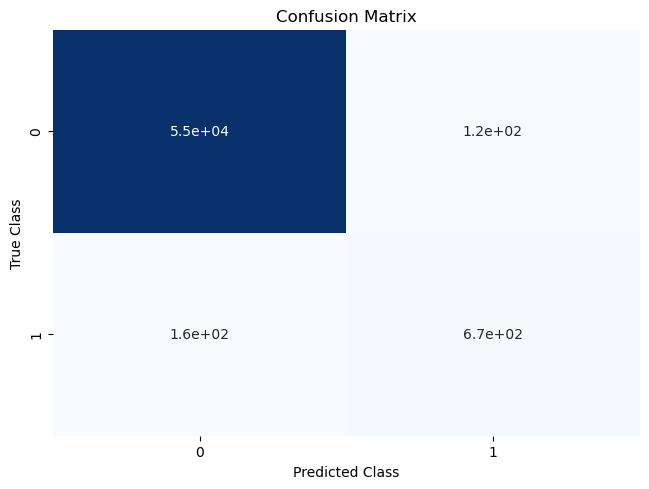

In [257]:
# Create pandas dataframe
matrix_df=pd.DataFrame(matrix)
#Create heatmap
sns.heatmap(matrix_df,annot=True,cbar=None,cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### 4.3 Identifying Important Features in Random Forests

In [258]:
# Calculate the feature importance
importances=random_forest_opt.feature_importances_
# Sort feature in descending order
indices=np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = X.columns[indices]

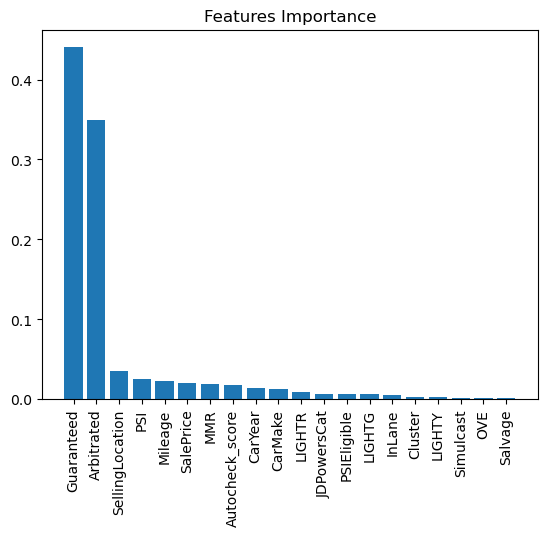

In [259]:
plt.bar(range(X.shape[1]),importances[indices])
plt.xticks(range(X.shape[1]),names,rotation=90)
plt.title('Features Importance')
plt.show()

Feature importance is a technique used in machine learning to identify the most influential features or variables in a model. It helps us understand which features have the most impact on the model's predictions and provides insights into the underlying relationships between features and the target variable.

Guaranteed

Arbitrated

#### 4.4  Who are the Risky Dealers?

In [260]:
data_df.head()

,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,...,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned
0,351757,441081,37055,1FAHP3M27CL374352,CAAI,FORD,13000,2012,13050,COMPACT CAR,...,0,0,0,0,1,13-07-25,1.000000,NaN,1,0.0
1,351757,442235,248,1G1JE6SB7D4103706,DETA,CHEVROLET,13900,2013,13600,COMPACT CAR,...,0,0,0,0,1,13-10-24,NaN,NaN,0,0.0
2,351757,436280,39627,1G1PG5SC4C7102274,CAAI,CHEVROLET,13800,2012,14050,MIDSIZE CAR,...,0,0,0,1,1,13-04-18,-2.666667,41,0,0.0
3,351757,436280,50773,1G1PG5SC5C7113820,CAAI,CHEVROLET,12900,2012,13150,MIDSIZE CAR,...,0,0,0,1,1,13-04-18,1.000000,31,0,0.0
4,351757,434202,54133,1GNKVGED4BJ301146,SVAA,CHEVROLET,17800,2011,18050,SUV,...,0,0,0,1,1,13-02-26,-1.400000,34,0,0.0


Retrieve their original categorical names

In [261]:
# Create a new DataFrame to store the combined data
combined_data = data_df.copy()
# Add the target variable
combined_data['Returned'] = target_variable
# Add columns for probabilities
combined_data['Probability'] = y_prob_rf_opt[:len(combined_data), 1]  # Select probabilities of the positive class 
# threshold value that separets the dealers into risky and non-risky categories
threshold=0.1
combined_data['Risk_Status'] = np.where(combined_data['Probability'] >= threshold, 'Risky', 'Non-Risky')
combined_data

,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,...,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,Guaranteed,Returned,Probability,Risk_Status
0,351757,441081,37055,1FAHP3M27CL374352,CAAI,FORD,13000,2012,13050,COMPACT CAR,...,0,0,1,13-07-25,1.000000,NaN,1,0.0,0.004342,Non-Risky
1,351757,442235,248,1G1JE6SB7D4103706,DETA,CHEVROLET,13900,2013,13600,COMPACT CAR,...,0,0,1,13-10-24,NaN,NaN,0,0.0,0.000000,Non-Risky
2,351757,436280,39627,1G1PG5SC4C7102274,CAAI,CHEVROLET,13800,2012,14050,MIDSIZE CAR,...,0,1,1,13-04-18,-2.666667,41,0,0.0,0.003241,Non-Risky
3,351757,436280,50773,1G1PG5SC5C7113820,CAAI,CHEVROLET,12900,2012,13150,MIDSIZE CAR,...,0,1,1,13-04-18,1.000000,31,0,0.0,0.000000,Non-Risky
4,351757,434202,54133,1GNKVGED4BJ301146,SVAA,CHEVROLET,17800,2011,18050,SUV,...,0,1,1,13-02-26,-1.400000,34,0,0.0,0.000000,Non-Risky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278332,376,414004,118650,1G6KD57Y36U107201,THAA,CADILLAC,2000,2006,5750,LUXURY CAR,...,0,1,0,13-12-26,0.473684,NaN,0,0.0,0.000000,Non-Risky
278333,376,82444,92591,JM1FE17N840122369,THAA,MAZDA,5000,2004,3725,SPORTS CAR,...,0,1,0,13-12-26,1.190476,NaN,1,0.0,0.020372,Non-Risky
278334,376,433251,85599,JTDKB20U383447580,BIGH,TOYOTA,7800,2008,8200,COMPACT CAR,...,1,0,1,13-12-23,2.428571,39,0,0.0,0.000000,Non-Risky
278335,376,82444,80711,YV1MS382282375952,THAA,VOLVO,4100,2008,7925,LUXURY CAR,...,0,1,0,13-12-26,-4.250000,RG,1,1.0,0.878479,Risky


In [262]:
risk_status_distribution = combined_data['Risk_Status'].value_counts(normalize=True) * 100
print(risk_status_distribution)

Non-Risky    97.408178
Risky         2.591822
Name: Risk_Status, dtype: float64


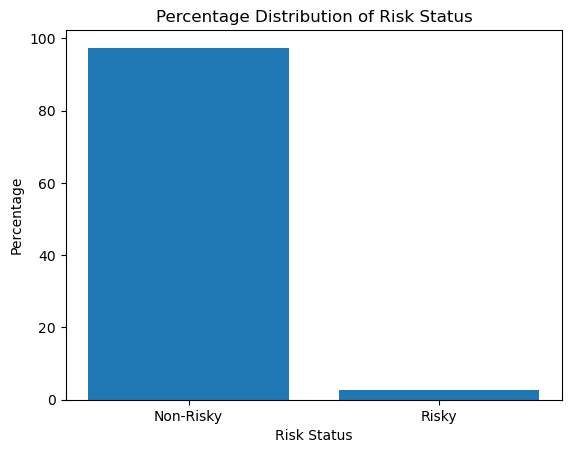

In [263]:
# Plot the bar plot
plt.bar(risk_status_distribution.index, risk_status_distribution.values)

# Add labels and title
plt.xlabel('Risk Status')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Risk Status')

# Show the plot
plt.show()

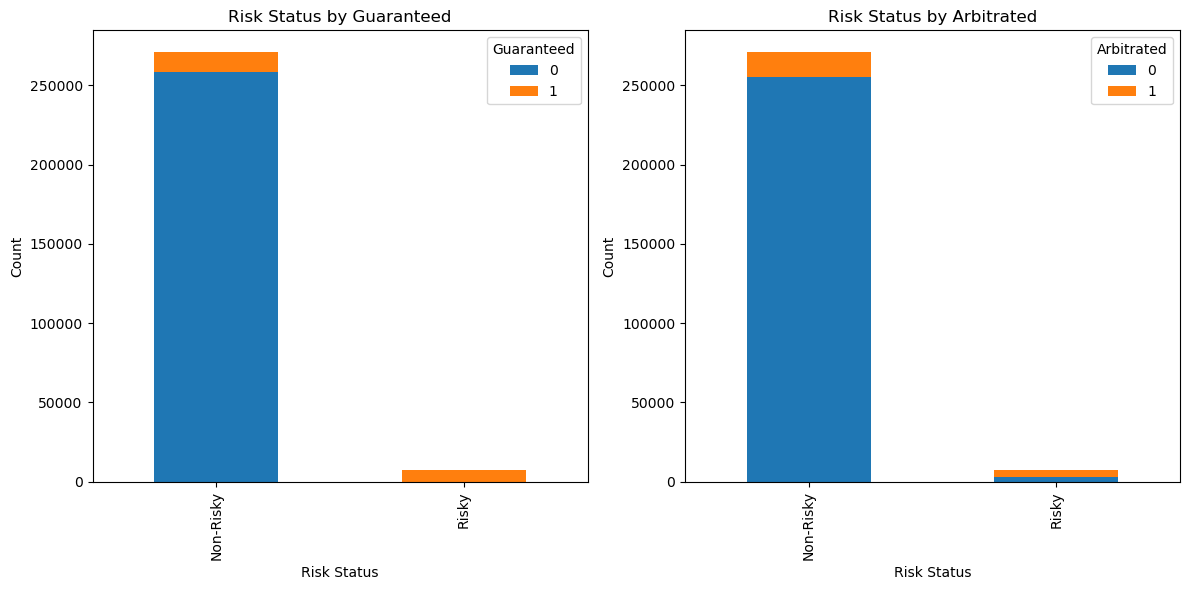

In [264]:
# Calculate the count of each Risk_Status by Guaranteed
risk_status_by_guaranteed = combined_data.groupby(['Risk_Status', 'Guaranteed']).size().unstack()

# Calculate the count of each Risk_Status by Arbitrated
risk_status_by_arbitrated = combined_data.groupby(['Risk_Status', 'Arbitrated']).size().unstack()

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the Risk_Status by Guaranteed
ax1 = axes[0]
risk_status_by_guaranteed.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Risk Status')
ax1.set_ylabel('Count')
ax1.set_title('Risk Status by Guaranteed')

# Plot the Risk_Status by Arbitrated
ax2 = axes[1]
risk_status_by_arbitrated.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Risk Status')
ax2.set_ylabel('Count')
ax2.set_title('Risk Status by Arbitrated')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [265]:
risky_sellinglocation_counts = combined_data[combined_data['Risk_Status'] == 'Risky']['SellingLocation'].value_counts().head(20)
print(risky_sellinglocation_counts)

AYCA    1428
BIGH    1216
THAA    1193
SVAA    1048
KCAA     555
CAAI     459
SLAA     418
MAA      149
AREN      82
GCAA      78
NADE      75
FAAO      61
NWE       49
MMAA      48
RSAA      37
GOAA      34
DALA      31
FAA       29
SKYA      27
SAAA      26
Name: SellingLocation, dtype: int64


In [266]:
risky_buyer_counts = combined_data[combined_data['Risk_Status'] == 'Risky']['BuyerID'].value_counts().head(20)
print(risky_buyer_counts)

272356    412
91593     224
344604    187
328701    167
125283    143
42970     134
135118    127
347761    122
134802    108
27789      90
62983      85
92671      77
247992     67
249383     65
18584      64
43412      63
19332      59
81115      57
88434      50
50602      46
Name: BuyerID, dtype: int64


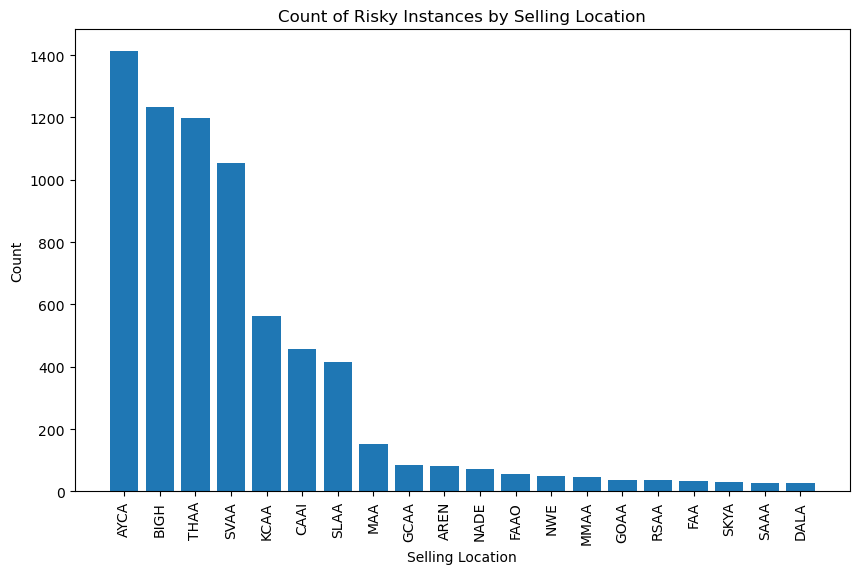

In [184]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(risky_sellinglocation_counts.index, risky_sellinglocation_counts.values)

# Add labels and title
plt.xlabel('Selling Location')
plt.ylabel('Count')
plt.title('Count of Risky Instances by Selling Location')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

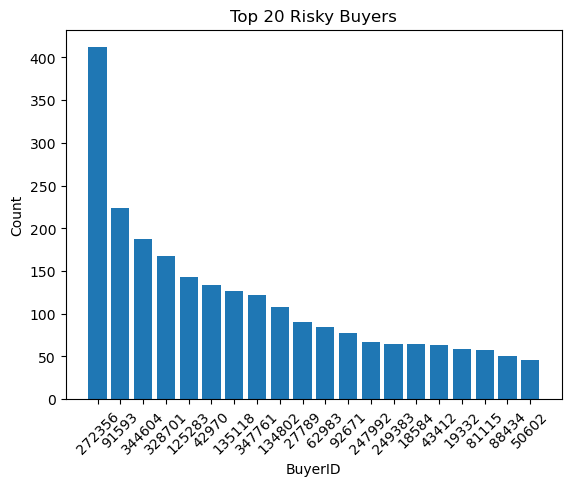

In [267]:
# Convert 'BuyerID' values to strings
buyer_ids = risky_buyer_counts.index.astype(str)
counts = risky_buyer_counts.values

# Plotting the bar graph
plt.bar(buyer_ids, counts)

# Adding labels and title
plt.xlabel('BuyerID')
plt.ylabel('Count')
plt.title('Top 20 Risky Buyers')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
# Displaying the plot
plt.show()

## 5 Conclusion

In conclusion, based on the feature importance analysis, the important features in evaluating risk dealers and mitigating business risk are "SellingLocation" and "Arbitrated". These features have shown significant importance in determining the likelihood of dealers being risky. Additionally, the Random Forest model performance has demonstrated excellent results, with high accuracy, precision, recall, and F1 score.

It is recommended to focus on dealers with a probability above 0.1, as they are more likely to be riskier. These dealers account for approximately 2.6% of the population considered in this analysis. By identifying and monitoring these dealers, appropriate measures can be taken to minimize potential losses and manage business risk effectively.


#### Avenue for Improvements 

Dimentionality reduction 

Model exploration including deep learning

Data Augmentaion to control class imbalance

Pipeline for better organization and code efficenecy


#### Appendix:


In [268]:
# Risk score combined data
combined_data.to_csv('Risk score.csv', index=False)